# AutoEncoder

## Manifold Learning
![](./asset/manifole_learning.png)
![](./asset/manifold_learning_2.png)

- Manifold란 근거리에서 봤을 땐, 유클리디언을 따르지만 원거리에서 보는 경우 그렇지 않은 공간. 실제 세상의 모든 데이터는 Manifold임
- 고차원 데이터 $d$ 를 저차원의 $r$에 효과적으로 표현할 수 있음. $d$차원의 데이터를 $r$차원에서 표현하고자 할 때, 각 데이터 간의 거리를 제대로 잴 수 있어야 하며 $r$공간을 찾는 것이 **Manifold Learning**

## AutoEncoder
<img src="./asset/AutoEncoder.png" width="300" height="600">

$$L(x, g(f(x)))$$

- $g(f(x))$와 $x$ 사이의 loss를 최소화
- AutoEncoder에서 인코더와 디코더는 모두 nonlinear activation을 사용
- nonlinear를 사용하지 않고 loss fuction으로 MSE를 사용하면 **PCA**와 같은 공간을 학습함

## 1. Import Libs

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import os
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Load Data

In [2]:
model_dir = './save_models/MNIST/Autoencoder'

if not os.path.exists(model_dir):
    os.mkdir(model_dir)

In [3]:
mnist_train = dset.MNIST("./data/MNIST", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = dset.MNIST("./data/MNIST", train=False, transform=transforms.ToTensor(), download=True)

In [4]:
batch_size = 16

train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

## 3. Build Model

In [5]:
class Autoencoder(nn.Module):
    def __init__(self, input_size, latent_size, output_size):
        super(Autoencoder, self).__init__()
        
        self.input_size = input_size
        self.latent_size = latent_size
        self.output_size = output_size

        self.encoder = nn.Linear(self.input_size, self.latent_size)
        self.decoder = nn.Linear(self.latent_size, self.output_size)
        
    def forward(self, inputs):
        batch_size = inputs.size(0)
        
        x = inputs.view(batch_size, -1)
        z = self.encoder(x)
        out = self.decoder(z).view(batch_size, 1, 28, 28)
        return out, z

In [6]:
input_size = 784
latent_size = 20
output_size = 784

model = Autoencoder(input_size, latent_size, output_size).cuda()

## 4. Loss func & Optim

In [7]:
loss_fn = nn.MSELoss() # nn.CrossEntropy()를 사용해도 됨
optimizer = optim.Adam(model.parameters(), lr=0.0002)

In [8]:
try:
    model = torch.load(model_dir + '/autoencoder.pkl')
    print("\n--------model restored--------\n")
except:
    print("\n--------model not restored--------\n")
    pass


--------model not restored--------



## 5. Train

In [9]:
num_epoch = 5
for i in range(num_epoch):
    for j, (image, label) in enumerate(train_loader):
        optimizer.zero_grad()
        
        x = image.cuda()
        output, _ = model(x)
        loss = loss_fn(output, x)
        
        loss.backward()
        optimizer.step()
        
        if j % 10 == 0:
            torch.save(model, model_dir + '/autoencoder.pkl')
            
        
    print("[%d/%d] MSE_loss : %0.5f"%(i+1, num_epoch, loss.item()))

/home/paulkim/anaconda3/envs/pytorch02/lib/python3.6/site-packages/torch/serialization.py:193: UserWarning: Couldn't retrieve source code for container of type Autoencoder. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


[1/5] MSE_loss : 0.03445
[2/5] MSE_loss : 0.03068
[3/5] MSE_loss : 0.02881
[4/5] MSE_loss : 0.02960
[5/5] MSE_loss : 0.02332


## 6. Check Train Image

output size :  torch.Size([16, 28, 28])


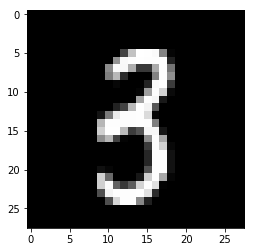

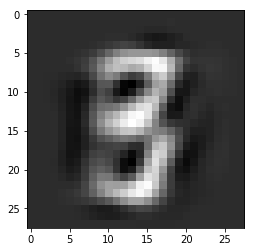

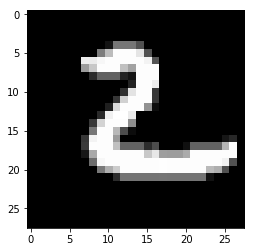

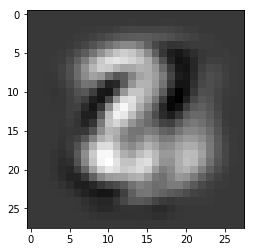

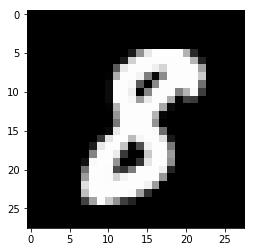

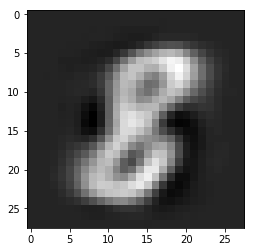

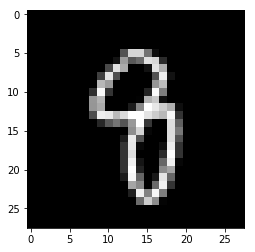

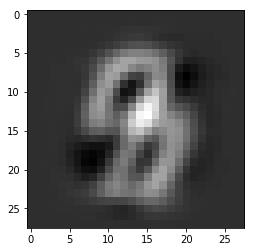

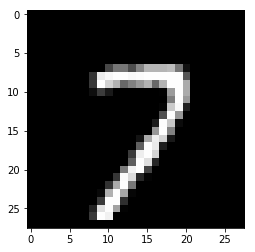

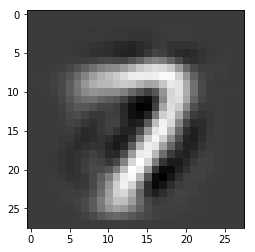

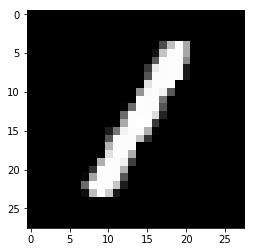

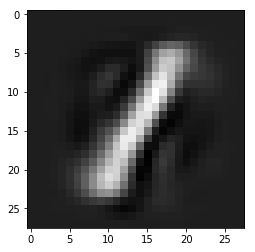

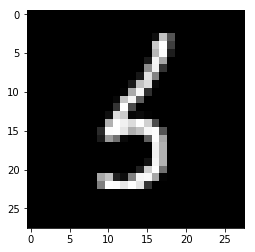

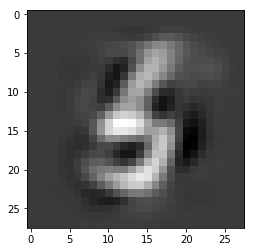

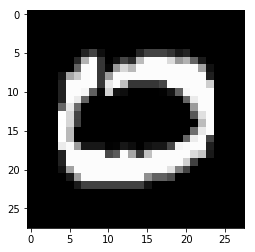

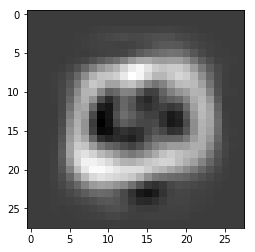

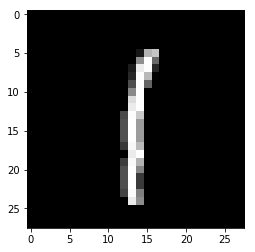

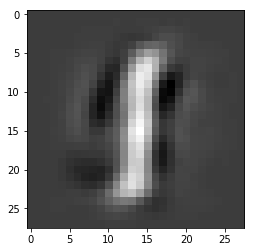

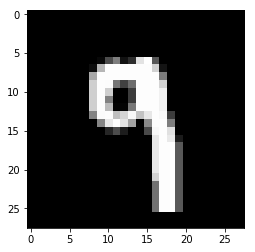

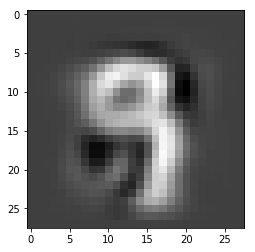

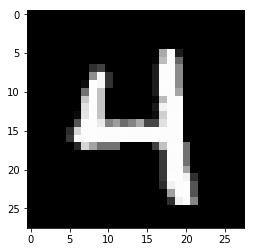

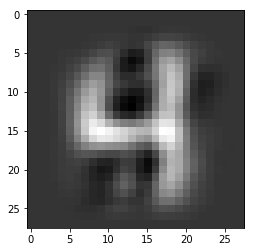

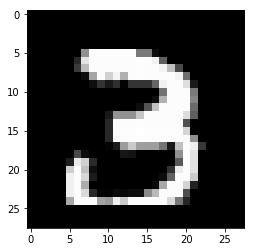

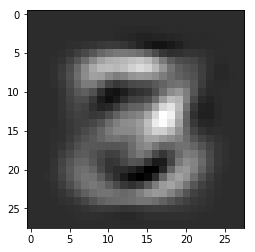

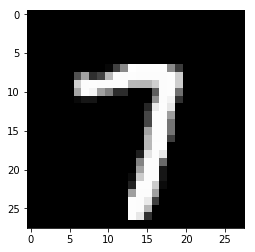

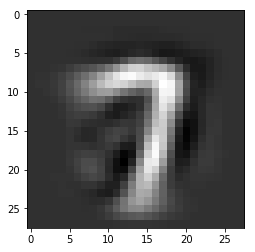

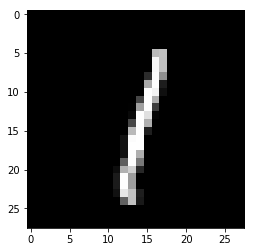

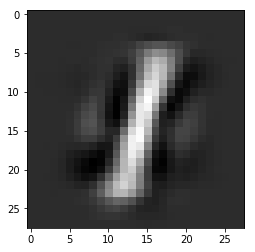

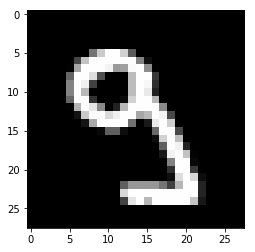

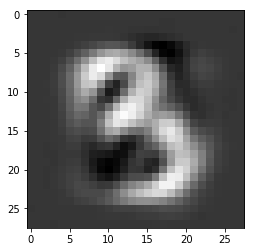

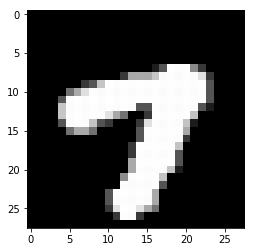

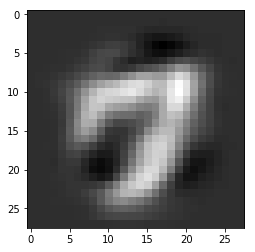

In [10]:
out_img = torch.squeeze(output.cpu().data)
print("output size : ", out_img.size())

for i in range(out_img.size()[0]):
    plt.imshow(torch.squeeze(image[i]).numpy(), cmap='gray')
    plt.show()
    plt.imshow(out_img[i].numpy(), cmap='gray')
    plt.show()

## 7. Check Test Image

In [11]:
for i in range(1):
    for j, (image, label) in enumerate(test_loader):
        optimizer.zero_grad()
        
        x = image.cuda()
        output, _ = model.forward(x)
        loss = loss_fn(output, x)
        
        loss.backward()
        optimizer.step()
        
    if j % 1000 == 0:
        print("[%d/%d] MSE_loss : %0.5f"%(i+1, num_epoch, loss.item()))

output size :  torch.Size([16, 28, 28])


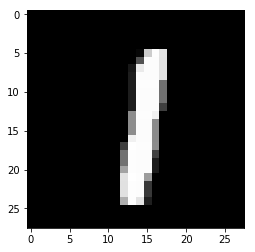

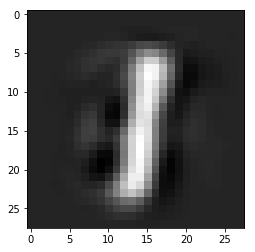

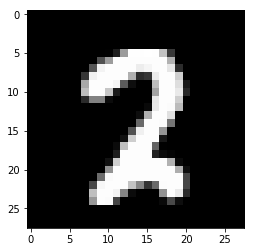

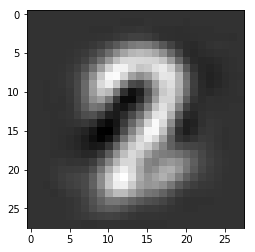

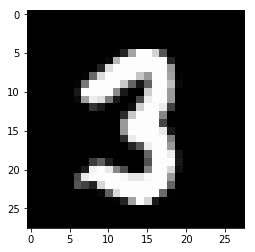

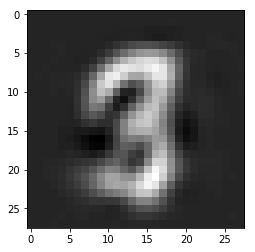

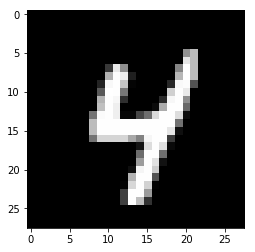

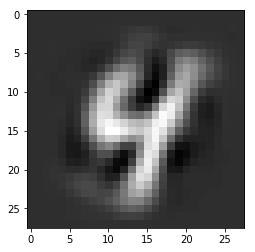

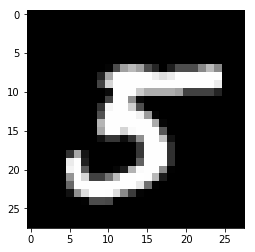

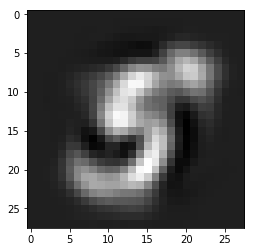

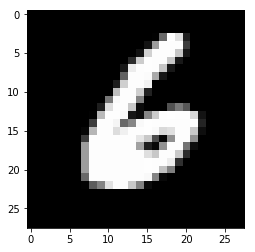

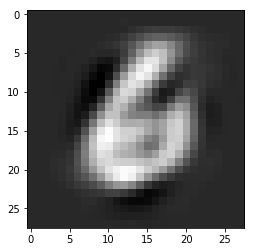

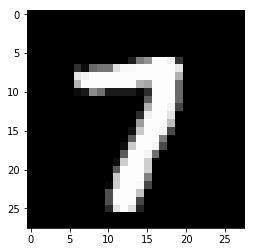

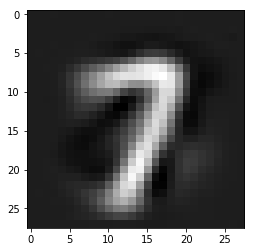

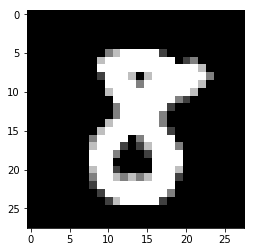

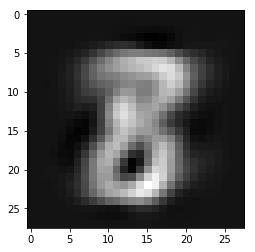

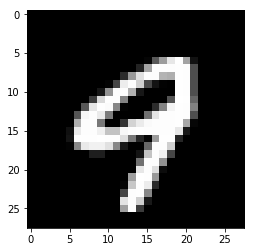

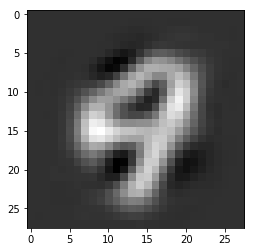

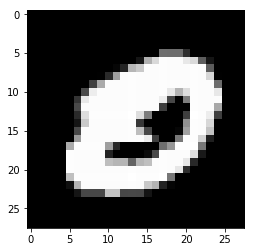

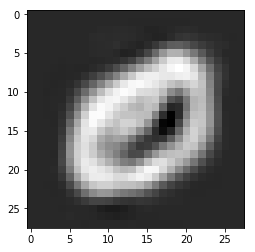

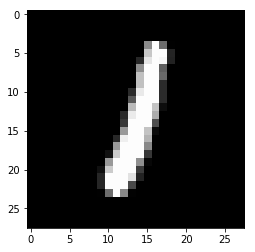

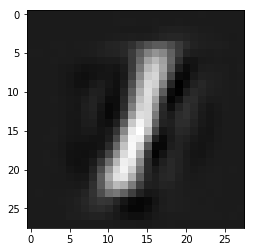

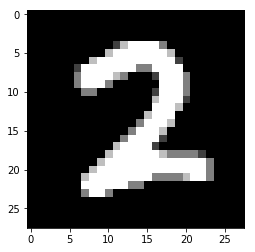

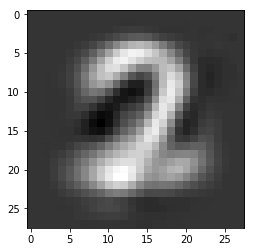

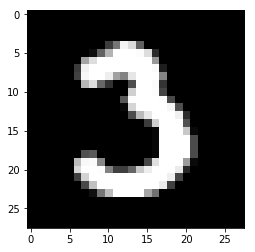

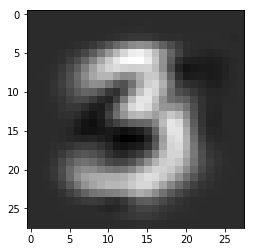

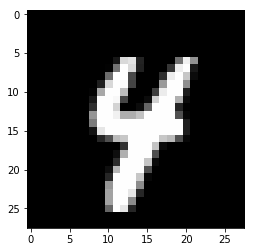

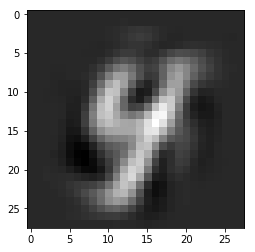

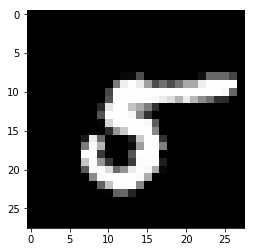

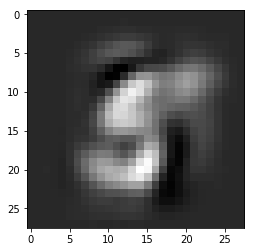

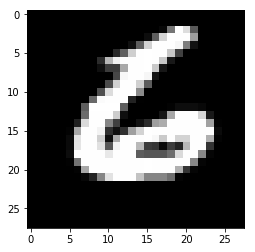

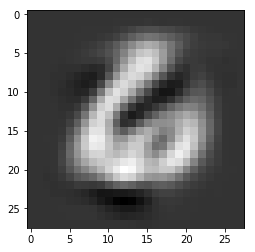

In [12]:
out_img = torch.squeeze(output.cpu().data)
print("output size : ", out_img.size())

for i in range(out_img.size()[0]):
    plt.imshow(torch.squeeze(image[i]).numpy(), cmap='gray')
    plt.show()
    plt.imshow(out_img[i].numpy(), cmap='gray')
    plt.show()